<a href="https://www.kaggle.com/code/shameerrao/data-science-project-3?scriptVersionId=154909424" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

Data Science Project 3
Shameer Rao, Alex Stoyanov-Roberts & Yaropolk Kulchyckyj
12/14/2023

In [1]:
# Library Imports
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

In [2]:
# Read CSV Files
csv_1209 = pd.read_csv("/kaggle/input/exploring-cybersecurity-risk-via-2022-cisa-vulne/2022-12-09-enriched.csv")
csv_0704 = pd.read_csv("/kaggle/input/exploring-cybersecurity-risk-via-2022-cisa-vulne/2022-07-04-enriched.csv")
csv_0627 = pd.read_csv("/kaggle/input/exploring-cybersecurity-risk-via-2022-cisa-vulne/2022-06-27-enriched.csv")
csv_0609 = pd.read_csv("/kaggle/input/exploring-cybersecurity-risk-via-2022-cisa-vulne/2022-06-09-enriched.csv")
csv_0608 = pd.read_csv("/kaggle/input/exploring-cybersecurity-risk-via-2022-cisa-vulne/2022-06-08-enriched.csv")

In [3]:
# Combine CSV's
combined_df = pd.concat([csv_1209, csv_0704, csv_0627, csv_0609, csv_0608], ignore_index=True)

In [4]:
display(combined_df.head(5))

,cve_id,vendor_project,product,vulnerability_name,date_added,short_description,required_action,due_date,notes,grp,pub_date,cvss,cwe,vector,complexity,severity
0,CVE-2021-27104,accellion,FTA,Accellion FTA OS Command Injection Vulnerability,2021-11-03,Accellion FTA 9_12_370 and earlier is affected...,Apply updates per vendor instructions.,2021-11-17,NaN,1,2021-02-16,9.8,CWE-78,NETWORK,LOW,CRITICAL
1,CVE-2021-27102,accellion,FTA,Accellion FTA OS Command Injection Vulnerability,2021-11-03,Accellion FTA 9_12_411 and earlier is affected...,Apply updates per vendor instructions.,2021-11-17,NaN,1,NaN,NaN,NaN,NaN,NaN,NaN
2,CVE-2021-27101,accellion,FTA,Accellion FTA SQL Injection Vulnerability,2021-11-03,Accellion FTA 9_12_370 and earlier is affected...,Apply updates per vendor instructions.,2021-11-17,NaN,1,NaN,NaN,NaN,NaN,NaN,NaN
3,CVE-2021-27103,accellion,FTA,Accellion FTA SSRF Vulnerability,2021-11-03,Accellion FTA 9_12_411 and earlier is affected...,Apply updates per vendor instructions.,2021-11-17,NaN,1,NaN,NaN,NaN,NaN,NaN,NaN
4,CVE-2021-21017,adobe,Acrobat and Reader,Adobe Acrobat and Reader Heap-based Buffer Ove...,2021-11-03,Acrobat Reader DC versions versions 2020.013.2...,Apply updates per vendor instructions.,2021-11-17,NaN,1,NaN,NaN,NaN,NaN,NaN,NaN


In [5]:
# combined_df has columns 'short_description' and 'severity'
combined_df = combined_df.dropna(subset=['short_description', 'severity'])

X = combined_df['short_description']
y = combined_df['severity']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Convert short descriptions to TF-IDF features
vectorizer = TfidfVectorizer()
X_train_vectorized = vectorizer.fit_transform(X_train)
X_test_vectorized = vectorizer.transform(X_test)

# Hyperparameter tuning using GridSearchCV
param_grid = {'alpha': [0.0005, 0.1, 0.5, 1.0]}
nb_classifier = MultinomialNB()
grid_search = GridSearchCV(nb_classifier, param_grid, cv=3)
grid_search.fit(X_train_vectorized, y_train)

# Get the best alpha value from the grid search
best_alpha = grid_search.best_params_['alpha']

# Retrain the model on the entire training set with the best hyperparameters
final_nb_classifier = MultinomialNB(alpha=best_alpha)
final_nb_classifier.fit(X_train_vectorized, y_train)

# Use the final model for predictions on the test set
y_pred = final_nb_classifier.predict(X_test_vectorized)

# Evaluate the final model
accuracy = accuracy_score(y_test, y_pred)
confusion_mat = confusion_matrix(y_test, y_pred)
classification_rep = classification_report(y_test, y_pred)

# Print the formatted evaluation metrics
print(f"Accuracy: {accuracy:.4f}\n")

print("Confusion Matrix:")
confusion_df = pd.DataFrame(confusion_mat, index=['CRITICAL', 'HIGH', 'MEDIUM'], columns=['CRITICAL', 'HIGH', 'MEDIUM'])
print(confusion_df.to_string())

print("\nClassification Report:")
print(classification_rep)

Accuracy: 0.9736

Confusion Matrix:
          CRITICAL  HIGH  MEDIUM
CRITICAL       157     6       0
HIGH             4   272       0
MEDIUM           0     3      50

Classification Report:
              precision    recall  f1-score   support

    CRITICAL       0.98      0.96      0.97       163
        HIGH       0.97      0.99      0.98       276
      MEDIUM       1.00      0.94      0.97        53

    accuracy                           0.97       492
   macro avg       0.98      0.96      0.97       492
weighted avg       0.97      0.97      0.97       492



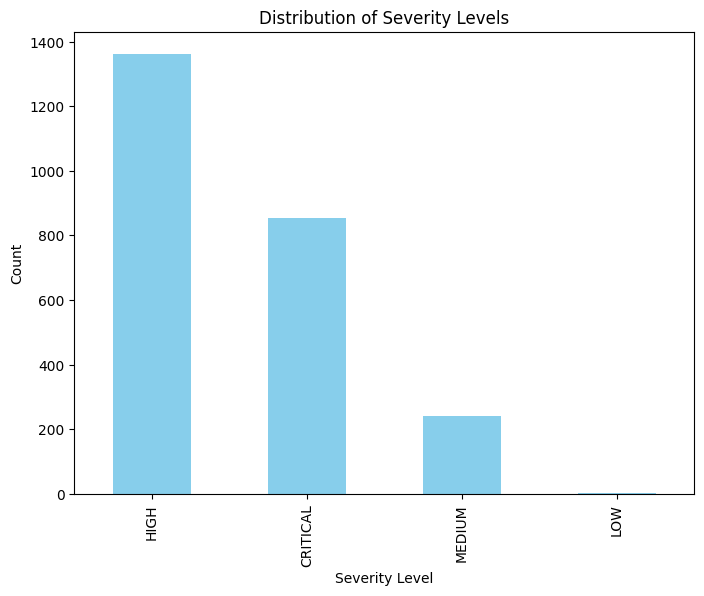

In [6]:
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 6))
combined_df['severity'].value_counts().plot(kind='bar', color='skyblue')
plt.title('Distribution of Severity Levels')
plt.xlabel('Severity Level')
plt.ylabel('Count')
plt.show()

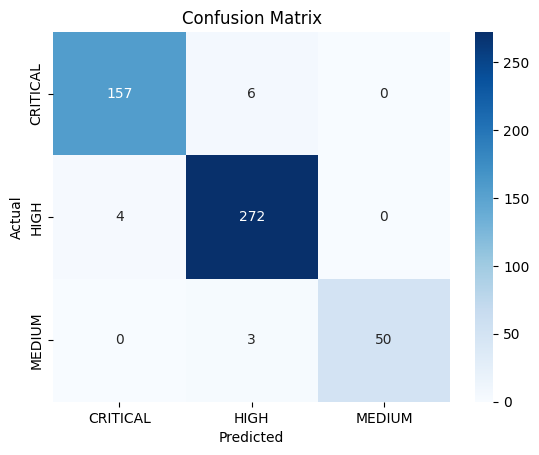

In [7]:
import seaborn as sns

sns.heatmap(confusion_mat, annot=True, fmt='d', cmap='Blues', 
            xticklabels=['CRITICAL', 'HIGH', 'MEDIUM'], 
            yticklabels=['CRITICAL', 'HIGH', 'MEDIUM'])
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.title('Confusion Matrix')
plt.show()

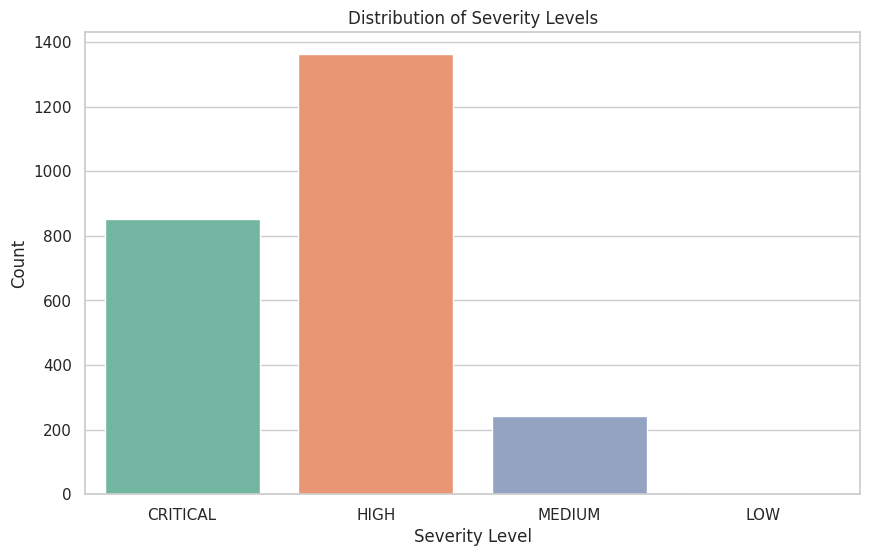

In [8]:
# Distribution Prior to Classification
import matplotlib.pyplot as plt
import seaborn as sns

# Setting the style
sns.set(style="whitegrid")

# Creating the histogram
plt.figure(figsize=(10, 6))
sns.countplot(x='severity', data=combined_df, palette='Set2')

# Adding titles and labels
plt.title('Distribution of Severity Levels')
plt.xlabel('Severity Level')
plt.ylabel('Count')

# Display the plot
plt.show()